In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.sfh as sfh
from scipy.stats import dirichlet
from astropy.cosmology import WMAP9 as cosmo

[[1.e-09 1.e-01]
 [1.e-01 1.e+00]
 [1.e+00 1.e+01]]
[[0.86939385 0.12537413 0.00523202]
 [0.2357698  0.48376813 0.28046207]
 [0.2859041  0.62637068 0.08772522]
 ...
 [0.22614967 0.2157667  0.55808362]
 [0.69111725 0.18300249 0.12588026]
 [0.14329723 0.50993436 0.34676841]]


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


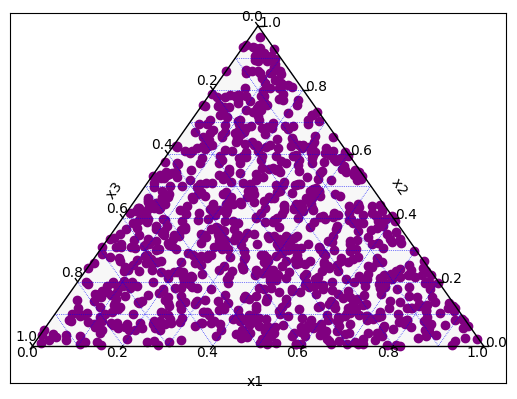

In [2]:
import ternary

age_bins = np.array([[0.0, 8.0], [8.0, 9.0], [9.0, 10.0]])
print((10**age_bins)/1e9)
nbins = len(age_bins)
alphas = np.ones(nbins)*1.0
samples = 1000
z_fractions = dirichlet(alphas).rvs(size=samples).reshape((samples, nbins))

print(z_fractions)

### Scatter Plot
scale = 1.0
fontsize = 10
figure, tax = ternary.figure(scale=scale)
tax.gridlines(multiple=0.1, color="blue")
tax.boundary(linewidth=1.0)
tax.scatter(z_fractions, color='purple')

tax.left_axis_label("x3 ", fontsize=fontsize)
tax.right_axis_label("x2 ", fontsize=fontsize)
tax.bottom_axis_label("x1", fontsize=fontsize)

tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f")

0.9997152235828771


(-15.0, -7.0)

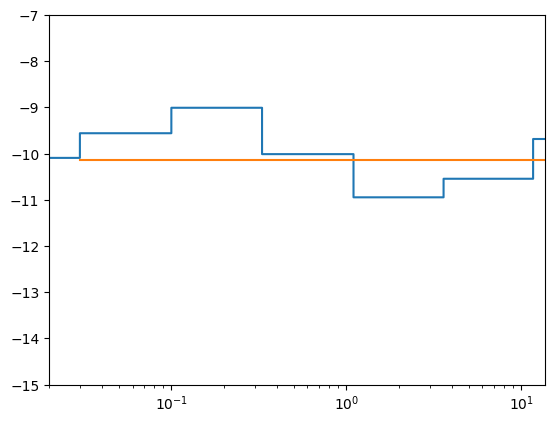

In [3]:
age_bins = np.log10(np.array([[10**-9, 30*0.001],
                    [30*0.001, 100*0.001],
                    [100*0.001, 330*0.001],  
                    [330*0.001, 1.1], 
                    [1.1, 3.6],
                    [3.6, 11.7],
                    [11.7, 13.7]])*10**9)

mass_norm = 10**10
alpha = 1.0
tuniv = 13.7

tabulatedsfh, masses = sfh.dirichlet_prior(age_bins, alpha, mass_norm)
times = tuniv-tabulatedsfh[0]
print(np.trapz(tabulatedsfh[1], tabulatedsfh[0]*1e9)/mass_norm)
plt.plot(times, np.log10(tabulatedsfh[1]/mass_norm))
plt.plot(10**age_bins[:, 1]/(10**9), np.log10(np.ones_like(age_bins[:, 1])*((1.0)/(tuniv*10**9))))
plt.xscale("log")
plt.xlim(0.02, 13.7)
plt.ylim(-15, -7)

Text(0.5, 0, 'Lookback Time [Gyr]')

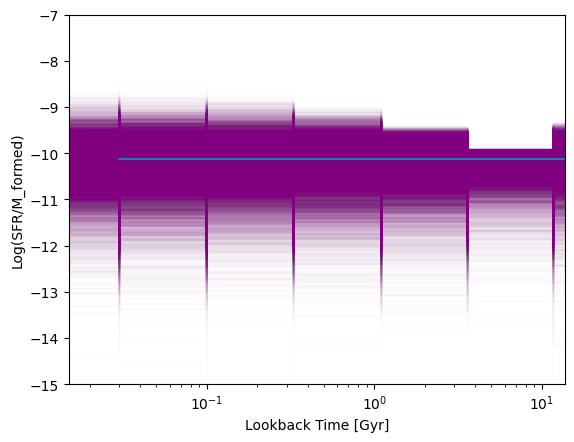

In [4]:
age_bins = np.log10(np.array([[10**-9, 30*0.001],
                    [30*0.001, 100*0.001],
                    [100*0.001, 330*0.001],  
                    [330*0.001, 1.1], 
                    [1.1, 3.6],
                    [3.6, 11.7],
                    [11.7, 13.7]])*10**9)

alpha = 1.0
nbins = len(age_bins)
nsamples = 10000
mass_norm = 10**10
tuniv = 13.7
massesformed = []
ages = []
recentsfhs = []
indx=0
while(indx < nsamples):

    tabulatedsfh, masses = sfh.dirichlet_prior(age_bins, alpha, mass_norm)
    times = tuniv-tabulatedsfh[0]
    mformed = np.trapz(tabulatedsfh[1], tabulatedsfh[0])*mass_norm
    massesformed.append(mformed)
    pointsfr = np.reshape(np.flip(tabulatedsfh[1]), (nbins, 2))[:, 0]
    ages.append(sfh.mwa(pointsfr, age_bins, mass_norm))
    recentsfhs.append(sfh.nonpar_recent_sfr(masses, age_bins))
    plt.plot(times, np.log10(tabulatedsfh[1]/mass_norm), color="purple", alpha=0.01)

    indx+=1

ages = np.asarray(ages)
recentsfhs = np.asarray(recentsfhs)

plt.plot(10**age_bins[:, 1]/(10**9), np.log10(np.ones_like(age_bins[:, 1])*((1.0)/(tuniv*10**9))))
plt.xlim(0.015, 13.7)
plt.ylim(-15, -7)
plt.xscale("log")
plt.ylabel("Log(SFR/M_formed)")
plt.xlabel("Lookback Time [Gyr]")

(0.0, 13.7)

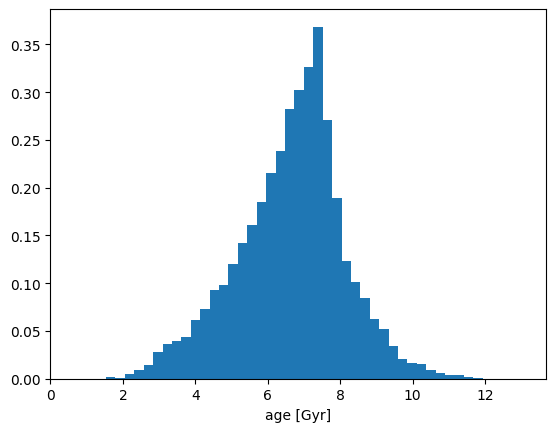

In [5]:
plt.hist(ages, bins=40, density=True)
plt.xlabel("age [Gyr]")
plt.xlim(0, 13.7)

(-12.0, -7.8)

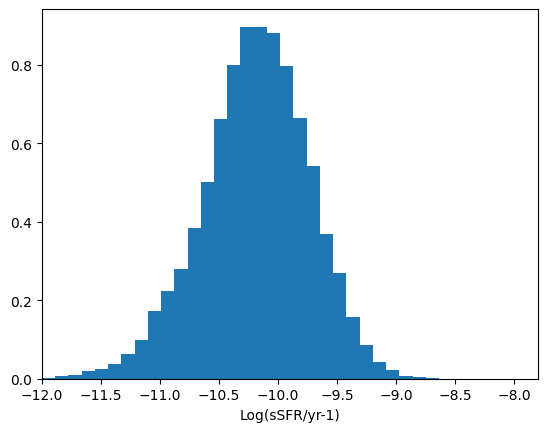

In [6]:
plt.hist(np.log10(recentsfhs/(mass_norm)), bins=40, density=True)
plt.xlabel("Log(sSFR/yr-1)")
plt.xlim(-12, -7.8)